In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = 34806.01

In [3]:
df_arriendos = pd.read_excel("arriendos.xlsx")

In [4]:
df_arriendos

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,Sin informacion,1,Sin informacion,2,No,8,25,9,Sin informacion,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",1,Sin informacion,https://departamento.mercadolibre.cl/MLC-11412...
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,Sin informacion,3,No,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",Sin informacion,Sin informacion,https://departamento.mercadolibre.cl/MLC-11415...
2,Edificio Buzo Sobenes- Vista Norte Piso 9,245.000,28 m²,28 m²,2,1,1,Sin informacion,2,Sí,9,15,37,Norte,56391 CLP,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",Sin informacion,Sin informacion,https://departamento.mercadolibre.cl/MLC-11416...
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,550.000,65.58 m²,58.11 m²,3,2,2,1,4,No,5,Sin informacion,Sin informacion,Oriente,135000 CLP,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",1,Sin informacion,https://departamento.mercadolibre.cl/MLC-11434...
4,Edificio Leonor Cepeda- Piso 11,480.000,59.4 m²,56.9 m²,4,3,2,1,6,No,11,29,23,Sin informacion,85000 CLP,"Leonor Cepeda 952, Hospitales, Independencia, ...",1,Sin informacion,https://departamento.mercadolibre.cl/MLC-11412...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,"Arrienda Gran Oficina Sector Villavicencio, Sa...",40,Sin informacion,150 m²,Sin informacion,Sin informacion,3,2,Sin informacion,Sin informacion,1,Sin informacion,Sin informacion,O,175000 CLP,"Villavicencio 361, Barrio Lastarria, Santiago,...",1,20 años,https://inmueble.mercadolibre.cl/MLC-949277901...
2012,Depto. Nuevo 1 Hab 1 Baño. Metro San Miguel,310.000,37.67 m²,37.67 m²,Sin informacion,1,1,Sin informacion,Sin informacion,Sí,Sin informacion,Sin informacion,10,P,65000 CLP,"Álvarez De Toledo 600 - 900, San Miguel, Chile...",Sin informacion,0 años,https://departamento.mercadolibre.cl/MLC-10402...
2013,1er Mes -50%. Disfruta Vistas Despejadas. 1d M...,280.000,29 m²,29 m²,Sin informacion,1,1,Sin informacion,2,No,12,13,24,N,70000 CLP,"Chiloe 1295, Santiago, Santiago, Chile, Parque...",Sin informacion,2017 años,https://departamento.mercadolibre.cl/MLC-10694...
2014,"Lo Gallo, Lo Beltran, Las Tranqueras",3.000.000,543 m²,230 m²,8,6,4,2,Sin informacion,Sin informacion,Sin informacion,Sin informacion,2,O,Sin informacion,"Lo Gallo, Lo Beltran, Las Tranqueras, Estadio ...",1,Sin informacion,https://casa.mercadolibre.cl/MLC-1090975001-lo...


In [5]:
df_arriendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nombre_arriendo              2016 non-null   object
 1   precio_departamento          2016 non-null   object
 2   superficie_total             2016 non-null   object
 3   superficie_util              2016 non-null   object
 4   ambientes                    2016 non-null   object
 5   dormitorios                  2016 non-null   object
 6   banos                        2016 non-null   object
 7   estacionamientos             2016 non-null   object
 8   cantidad_maxima_habitantes   2016 non-null   object
 9   admite_mascotas              2016 non-null   object
 10  piso_de_la_unidad            2016 non-null   object
 11  departamentos_por_piso       2016 non-null   object
 12  cantidad_pisos_departamento  2016 non-null   object
 13  orientacion                  2016

In [6]:
for columnas in df_arriendos.columns:
    df_arriendos[columnas] = np.where(df_arriendos[columnas] == "Sin informacion", np.nan, df_arriendos[columnas])

In [7]:
df_arriendos

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,NaN,1,NaN,2,No,8,25,9,NaN,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",1,NaN,https://departamento.mercadolibre.cl/MLC-11412...
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,NaN,3,No,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",NaN,NaN,https://departamento.mercadolibre.cl/MLC-11415...
2,Edificio Buzo Sobenes- Vista Norte Piso 9,245.000,28 m²,28 m²,2,1,1,NaN,2,Sí,9,15,37,Norte,56391 CLP,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",NaN,NaN,https://departamento.mercadolibre.cl/MLC-11416...
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,550.000,65.58 m²,58.11 m²,3,2,2,1,4,No,5,NaN,NaN,Oriente,135000 CLP,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",1,NaN,https://departamento.mercadolibre.cl/MLC-11434...
4,Edificio Leonor Cepeda- Piso 11,480.000,59.4 m²,56.9 m²,4,3,2,1,6,No,11,29,23,NaN,85000 CLP,"Leonor Cepeda 952, Hospitales, Independencia, ...",1,NaN,https://departamento.mercadolibre.cl/MLC-11412...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,"Arrienda Gran Oficina Sector Villavicencio, Sa...",40,NaN,150 m²,NaN,NaN,3,2,NaN,NaN,1,NaN,NaN,O,175000 CLP,"Villavicencio 361, Barrio Lastarria, Santiago,...",1,20 años,https://inmueble.mercadolibre.cl/MLC-949277901...
2012,Depto. Nuevo 1 Hab 1 Baño. Metro San Miguel,310.000,37.67 m²,37.67 m²,NaN,1,1,NaN,NaN,Sí,NaN,NaN,10,P,65000 CLP,"Álvarez De Toledo 600 - 900, San Miguel, Chile...",NaN,0 años,https://departamento.mercadolibre.cl/MLC-10402...
2013,1er Mes -50%. Disfruta Vistas Despejadas. 1d M...,280.000,29 m²,29 m²,NaN,1,1,NaN,2,No,12,13,24,N,70000 CLP,"Chiloe 1295, Santiago, Santiago, Chile, Parque...",NaN,2017 años,https://departamento.mercadolibre.cl/MLC-10694...
2014,"Lo Gallo, Lo Beltran, Las Tranqueras",3.000.000,543 m²,230 m²,8,6,4,2,NaN,NaN,NaN,NaN,2,O,NaN,"Lo Gallo, Lo Beltran, Las Tranqueras, Estadio ...",1,NaN,https://casa.mercadolibre.cl/MLC-1090975001-lo...


In [8]:
df_arriendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nombre_arriendo              2016 non-null   object
 1   precio_departamento          2016 non-null   object
 2   superficie_total             2006 non-null   object
 3   superficie_util              2006 non-null   object
 4   ambientes                    939 non-null    object
 5   dormitorios                  1815 non-null   object
 6   banos                        1978 non-null   object
 7   estacionamientos             1036 non-null   object
 8   cantidad_maxima_habitantes   563 non-null    object
 9   admite_mascotas              743 non-null    object
 10  piso_de_la_unidad            892 non-null    object
 11  departamentos_por_piso       668 non-null    object
 12  cantidad_pisos_departamento  929 non-null    object
 13  orientacion                  1219

<AxesSubplot:>

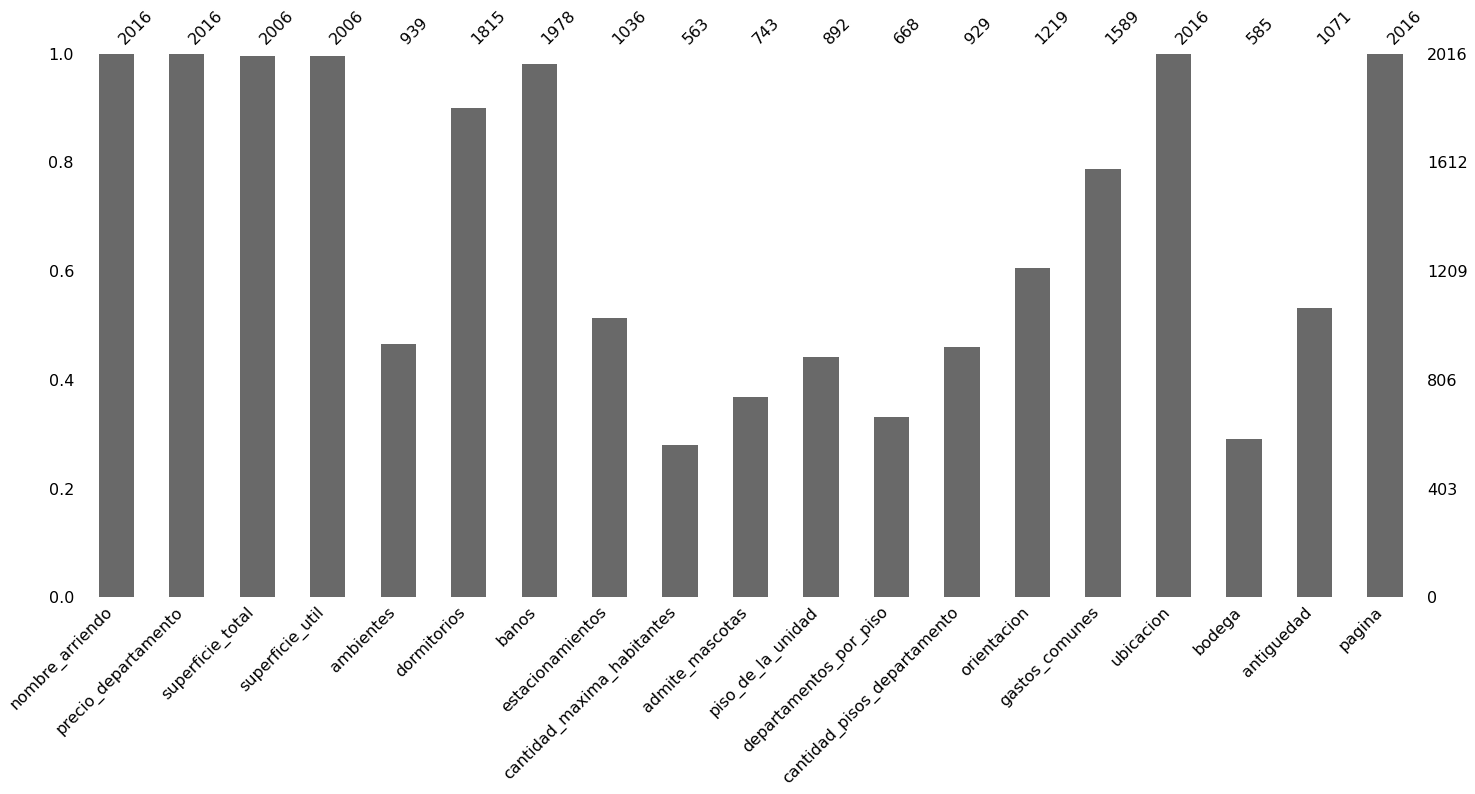

In [9]:
msno.bar(df_arriendos)

<AxesSubplot:>

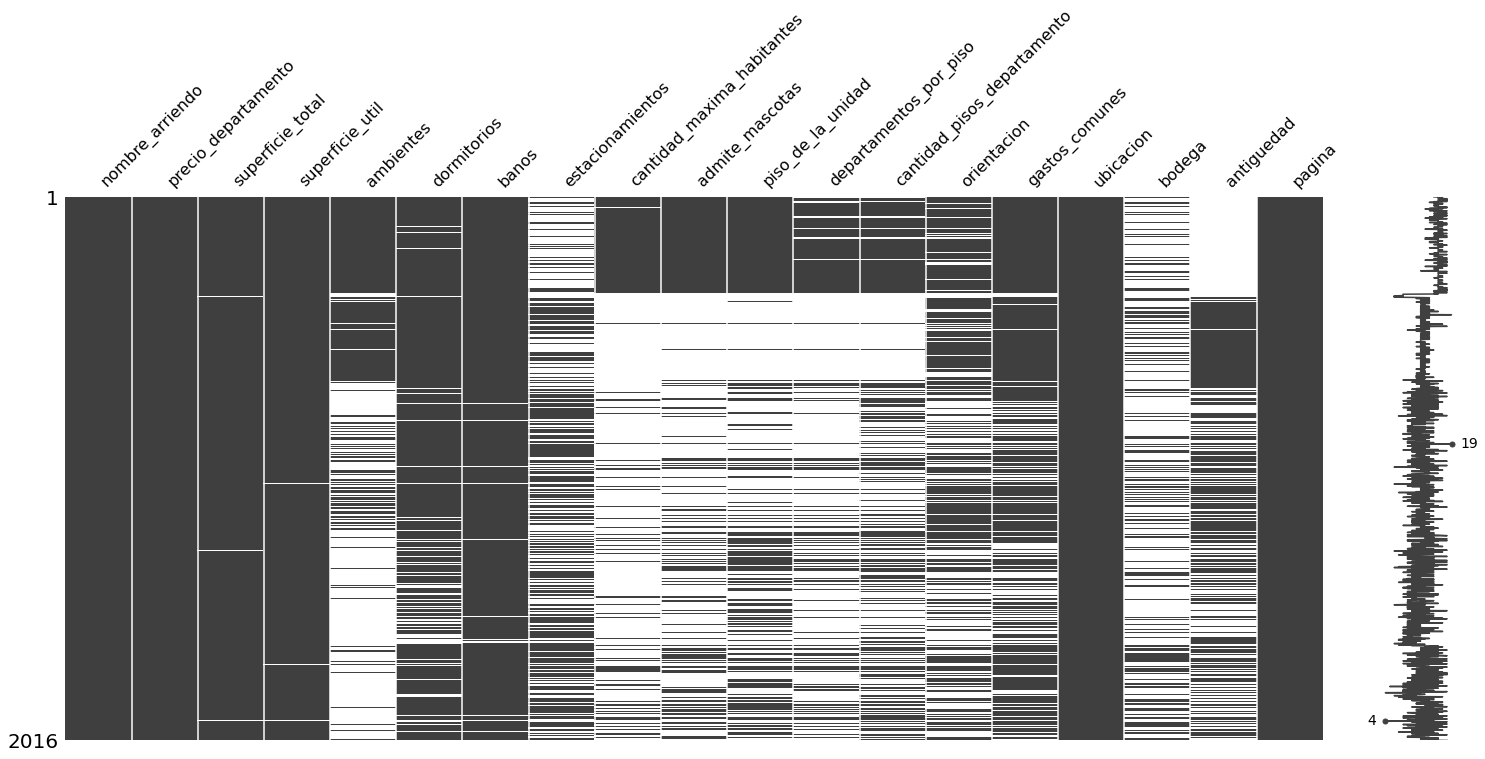

In [10]:
msno.matrix(df_arriendos)

In [11]:
df_arriendos['pagina'][df_arriendos["gastos_comunes"].isna()]

44      https://departamento.mercadolibre.cl/MLC-10771...
115     https://departamento.mercadolibre.cl/MLC-10984...
274     https://departamento.mercadolibre.cl/MLC-10681...
361     https://departamento.mercadolibre.cl/MLC-96562...
362     https://departamento.mercadolibre.cl/MLC-95419...
                              ...                        
2000    https://departamento.mercadolibre.cl/MLC-11107...
2001    https://casa.mercadolibre.cl/MLC-1093670873-ca...
2003    https://departamento.mercadolibre.cl/MLC-11180...
2007    https://casa.mercadolibre.cl/MLC-1054094151-ca...
2014    https://casa.mercadolibre.cl/MLC-1090975001-lo...
Name: pagina, Length: 427, dtype: object

In [12]:
df_arriendos['pagina']

0       https://departamento.mercadolibre.cl/MLC-11412...
1       https://departamento.mercadolibre.cl/MLC-11415...
2       https://departamento.mercadolibre.cl/MLC-11416...
3       https://departamento.mercadolibre.cl/MLC-11434...
4       https://departamento.mercadolibre.cl/MLC-11412...
                              ...                        
2011    https://inmueble.mercadolibre.cl/MLC-949277901...
2012    https://departamento.mercadolibre.cl/MLC-10402...
2013    https://departamento.mercadolibre.cl/MLC-10694...
2014    https://casa.mercadolibre.cl/MLC-1090975001-lo...
2015    https://departamento.mercadolibre.cl/MLC-10968...
Name: pagina, Length: 2016, dtype: object

In [13]:
df_arriendos['casa/depto'] = ''

In [14]:
for index, value in df_arriendos['pagina'].iteritems():
    if 'inmueble' in value:
        valor = 'inmueble'
    elif 'local' in value:
        valor = 'local'
    elif 'casa' in value:
        valor = 'casa'
    elif 'departamento' in value:
        valor = 'departamento'
    else:
        valor = 'otro'
    df_arriendos['casa/depto'][index] = valor

In [15]:
df_arriendos

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,NaN,1,NaN,2,No,8,25,9,NaN,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",1,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,NaN,3,No,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",NaN,NaN,https://departamento.mercadolibre.cl/MLC-11415...,departamento
2,Edificio Buzo Sobenes- Vista Norte Piso 9,245.000,28 m²,28 m²,2,1,1,NaN,2,Sí,9,15,37,Norte,56391 CLP,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",NaN,NaN,https://departamento.mercadolibre.cl/MLC-11416...,departamento
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,550.000,65.58 m²,58.11 m²,3,2,2,1,4,No,5,NaN,NaN,Oriente,135000 CLP,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",1,NaN,https://departamento.mercadolibre.cl/MLC-11434...,departamento
4,Edificio Leonor Cepeda- Piso 11,480.000,59.4 m²,56.9 m²,4,3,2,1,6,No,11,29,23,NaN,85000 CLP,"Leonor Cepeda 952, Hospitales, Independencia, ...",1,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,"Arrienda Gran Oficina Sector Villavicencio, Sa...",40,NaN,150 m²,NaN,NaN,3,2,NaN,NaN,1,NaN,NaN,O,175000 CLP,"Villavicencio 361, Barrio Lastarria, Santiago,...",1,20 años,https://inmueble.mercadolibre.cl/MLC-949277901...,inmueble
2012,Depto. Nuevo 1 Hab 1 Baño. Metro San Miguel,310.000,37.67 m²,37.67 m²,NaN,1,1,NaN,NaN,Sí,NaN,NaN,10,P,65000 CLP,"Álvarez De Toledo 600 - 900, San Miguel, Chile...",NaN,0 años,https://departamento.mercadolibre.cl/MLC-10402...,departamento
2013,1er Mes -50%. Disfruta Vistas Despejadas. 1d M...,280.000,29 m²,29 m²,NaN,1,1,NaN,2,No,12,13,24,N,70000 CLP,"Chiloe 1295, Santiago, Santiago, Chile, Parque...",NaN,2017 años,https://departamento.mercadolibre.cl/MLC-10694...,departamento
2014,"Lo Gallo, Lo Beltran, Las Tranqueras",3.000.000,543 m²,230 m²,8,6,4,2,NaN,NaN,NaN,NaN,2,O,NaN,"Lo Gallo, Lo Beltran, Las Tranqueras, Estadio ...",1,NaN,https://casa.mercadolibre.cl/MLC-1090975001-lo...,casa


In [16]:
df_arriendos['casa/depto'].value_counts()

departamento    1552
casa             269
inmueble         149
local             46
Name: casa/depto, dtype: int64

In [17]:
df_arriendos[df_arriendos['casa/depto']=='otro']

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto


In [18]:
df_arriendos[df_arriendos['casa/depto'] != 'local'][df_arriendos['casa/depto'] != 'inmueble']

<ipython-input-18-9318c49f4e8f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_arriendos[df_arriendos['casa/depto'] != 'local'][df_arriendos['casa/depto'] != 'inmueble']


,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,NaN,1,NaN,2,No,8,25,9,NaN,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",1,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,NaN,3,No,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",NaN,NaN,https://departamento.mercadolibre.cl/MLC-11415...,departamento
2,Edificio Buzo Sobenes- Vista Norte Piso 9,245.000,28 m²,28 m²,2,1,1,NaN,2,Sí,9,15,37,Norte,56391 CLP,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",NaN,NaN,https://departamento.mercadolibre.cl/MLC-11416...,departamento
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,550.000,65.58 m²,58.11 m²,3,2,2,1,4,No,5,NaN,NaN,Oriente,135000 CLP,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",1,NaN,https://departamento.mercadolibre.cl/MLC-11434...,departamento
4,Edificio Leonor Cepeda- Piso 11,480.000,59.4 m²,56.9 m²,4,3,2,1,6,No,11,29,23,NaN,85000 CLP,"Leonor Cepeda 952, Hospitales, Independencia, ...",1,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,Departamento En Arriendo De 3 Dorm. En Las Condes,51,203 m²,193 m²,NaN,3,4,2,NaN,No,NaN,NaN,NaN,Nor-Oriente,380000 CLP,"El Golf, Barrio El Golf, Las Condes, RM (Metro...",1,NaN,https://departamento.mercadolibre.cl/MLC-10540...,departamento
2012,Depto. Nuevo 1 Hab 1 Baño. Metro San Miguel,310.000,37.67 m²,37.67 m²,NaN,1,1,NaN,NaN,Sí,NaN,NaN,10,P,65000 CLP,"Álvarez De Toledo 600 - 900, San Miguel, Chile...",NaN,0 años,https://departamento.mercadolibre.cl/MLC-10402...,departamento
2013,1er Mes -50%. Disfruta Vistas Despejadas. 1d M...,280.000,29 m²,29 m²,NaN,1,1,NaN,2,No,12,13,24,N,70000 CLP,"Chiloe 1295, Santiago, Santiago, Chile, Parque...",NaN,2017 años,https://departamento.mercadolibre.cl/MLC-10694...,departamento
2014,"Lo Gallo, Lo Beltran, Las Tranqueras",3.000.000,543 m²,230 m²,8,6,4,2,NaN,NaN,NaN,NaN,2,O,NaN,"Lo Gallo, Lo Beltran, Las Tranqueras, Estadio ...",1,NaN,https://casa.mercadolibre.cl/MLC-1090975001-lo...,casa


### Eliminare los arriendos que no corresponden a departamentos ni casas

In [19]:
df_filtrado = df_arriendos[df_arriendos['casa/depto'] != 'local'][df_arriendos['casa/depto'] != 'inmueble']

<ipython-input-19-1ba309566efc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_arriendos[df_arriendos['casa/depto'] != 'local'][df_arriendos['casa/depto'] != 'inmueble']


In [20]:
df_filtrado['casa/depto'].value_counts()

departamento    1552
casa             269
Name: casa/depto, dtype: int64

<AxesSubplot:>

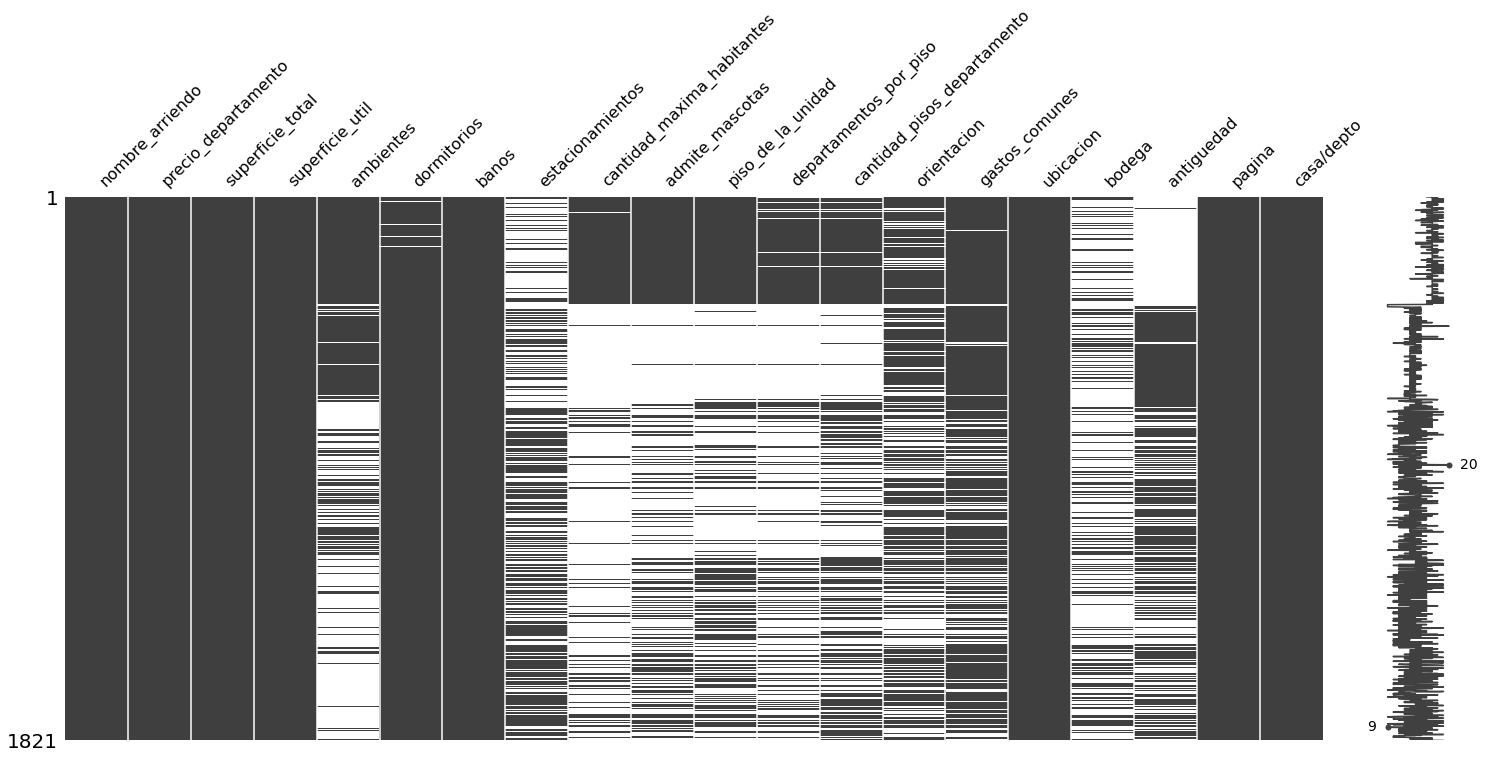

In [21]:
msno.matrix(df_filtrado)

<AxesSubplot:>

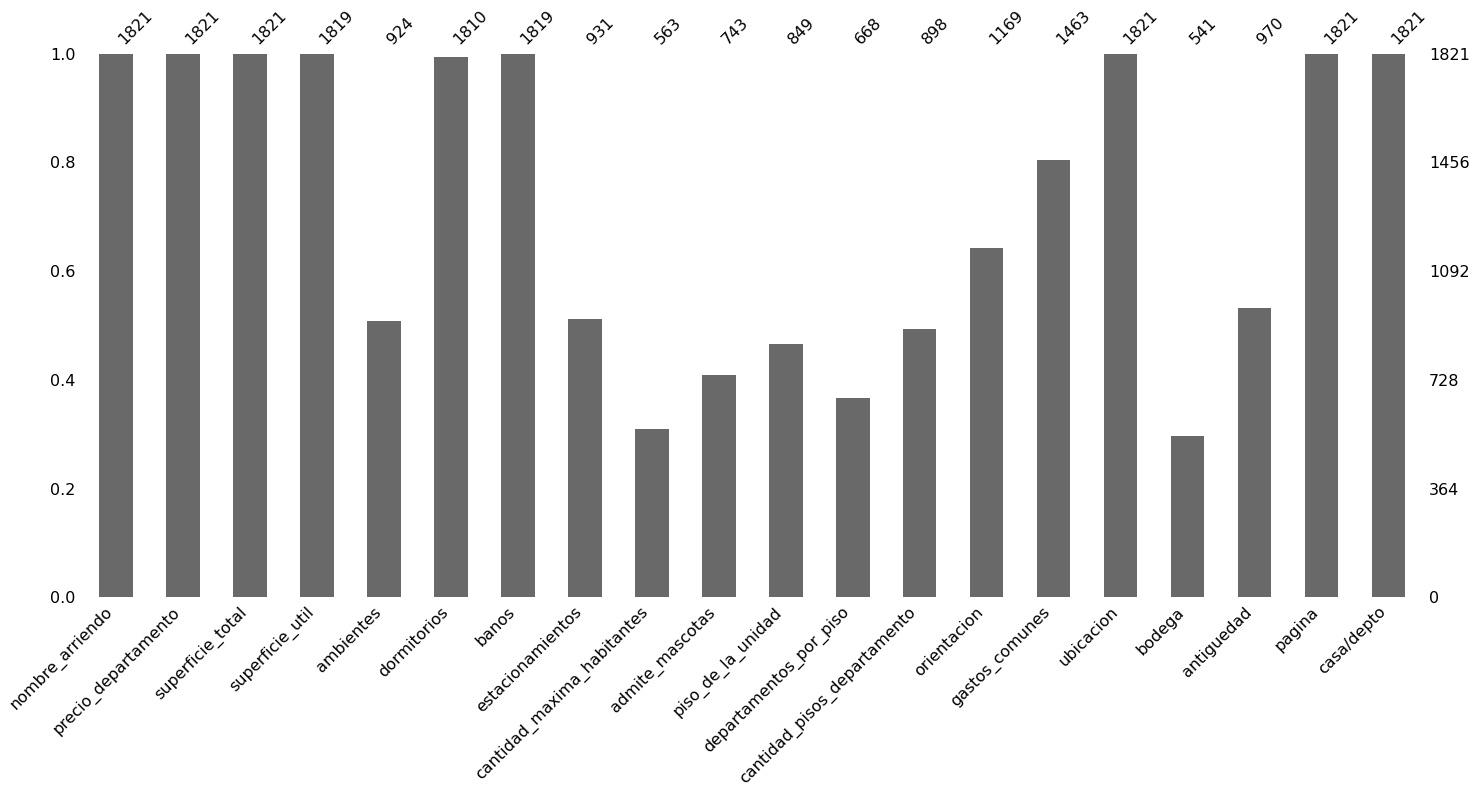

In [22]:
msno.bar(df_filtrado)

### Reorganizando variables

In [23]:
df_filtrado['bodega'].value_counts() 

1    534
2      7
Name: bodega, dtype: int64

In [24]:
df_filtrado['bodega'] = np.where(df_filtrado['bodega'].isna(), 'no', 'si')

In [25]:
df_filtrado.head()

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,NaN,1,NaN,2,No,8,25,9,NaN,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",si,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,NaN,3,No,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",no,NaN,https://departamento.mercadolibre.cl/MLC-11415...,departamento
2,Edificio Buzo Sobenes- Vista Norte Piso 9,245.000,28 m²,28 m²,2,1,1,NaN,2,Sí,9,15,37,Norte,56391 CLP,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",no,NaN,https://departamento.mercadolibre.cl/MLC-11416...,departamento
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,550.000,65.58 m²,58.11 m²,3,2,2,1,4,No,5,NaN,NaN,Oriente,135000 CLP,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",si,NaN,https://departamento.mercadolibre.cl/MLC-11434...,departamento
4,Edificio Leonor Cepeda- Piso 11,480.000,59.4 m²,56.9 m²,4,3,2,1,6,No,11,29,23,NaN,85000 CLP,"Leonor Cepeda 952, Hospitales, Independencia, ...",si,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento


In [26]:
df_filtrado['bodega'].value_counts() 

no    1280
si     541
Name: bodega, dtype: int64

In [27]:
df_filtrado['admite_mascotas'] = np.where(df_filtrado['admite_mascotas'].isna(), 'No','Sí')

In [28]:
df_filtrado['admite_mascotas'].value_counts()

No    1078
Sí     743
Name: admite_mascotas, dtype: int64

In [29]:
df_filtrado['pagina'][df_filtrado['estacionamientos']=='20']

1307    https://casa.mercadolibre.cl/MLC-959398350-exc...
Name: pagina, dtype: object

In [30]:
df_filtrado['estacionamientos'] = np.where(df_filtrado['estacionamientos'].isna(), 0, df_filtrado['estacionamientos'])

In [31]:
df_filtrado.head()

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,NaN,1,0,2,Sí,8,25,9,NaN,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",si,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,0,3,Sí,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",no,NaN,https://departamento.mercadolibre.cl/MLC-11415...,departamento
2,Edificio Buzo Sobenes- Vista Norte Piso 9,245.000,28 m²,28 m²,2,1,1,0,2,Sí,9,15,37,Norte,56391 CLP,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",no,NaN,https://departamento.mercadolibre.cl/MLC-11416...,departamento
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,550.000,65.58 m²,58.11 m²,3,2,2,1,4,Sí,5,NaN,NaN,Oriente,135000 CLP,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",si,NaN,https://departamento.mercadolibre.cl/MLC-11434...,departamento
4,Edificio Leonor Cepeda- Piso 11,480.000,59.4 m²,56.9 m²,4,3,2,1,6,Sí,11,29,23,NaN,85000 CLP,"Leonor Cepeda 952, Hospitales, Independencia, ...",si,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento


<AxesSubplot:>

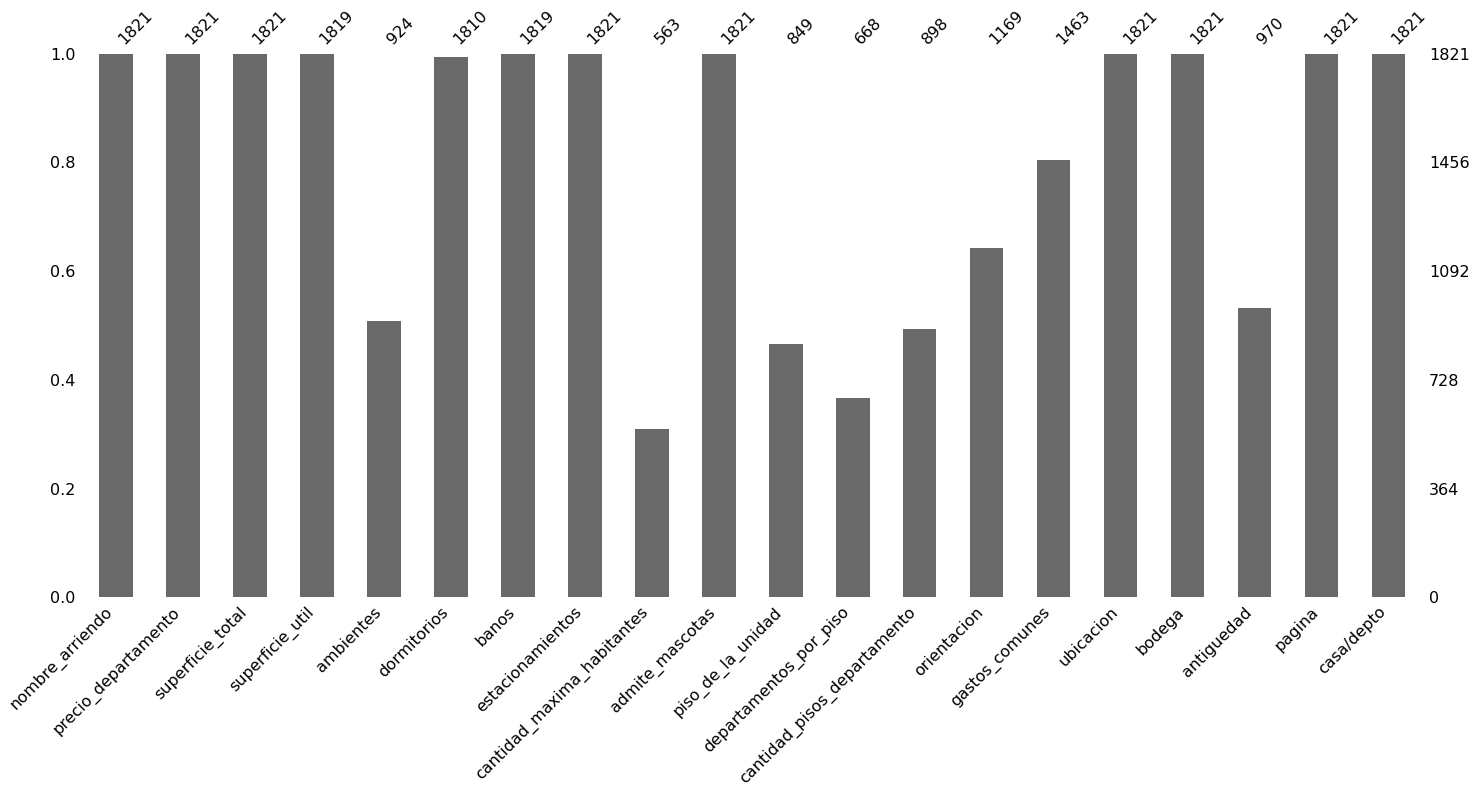

In [32]:
msno.bar(df_filtrado)

In [33]:
df_filtrado['gastos_comunes'] = np.where(df_filtrado['gastos_comunes'].isna(), '0', df_filtrado['gastos_comunes'])

In [34]:
df_filtrado['gastos_comunes'].value_counts()

0             358
60000 CLP     127
50000 CLP     100
70000 CLP      80
0 CLP          79
             ... 
47990 CLP       1
123000 CLP      1
80999 CLP       1
285000 CLP      1
89997 CLP       1
Name: gastos_comunes, Length: 174, dtype: int64

### Eliminar Duplicados

In [35]:
df_filtrado.drop_duplicates(subset=['nombre_arriendo'],keep='first', inplace = True)

In [36]:
df_filtrado.head(2)

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,NaN,1,0,2,Sí,8,25,9,NaN,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",si,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,0,3,Sí,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",no,NaN,https://departamento.mercadolibre.cl/MLC-11415...,departamento


### Unificar variables de la columna orientación

In [37]:
df_filtrado['orientacion'].value_counts()

Sur                177
Norte              175
Este               103
Oeste               98
O                   72
Oriente             71
Poniente            58
N                   58
P                   46
NP                  39
S                   32
SO                  26
SP                  17
NOSP                14
Surponiente         10
Nororiente           9
Nor-Oriente          9
Norponiente          8
Nor-Poniente         5
-                    4
Sur-Oriente          3
ORIENTE              2
NorPoniente-Sur      1
Nor-Orienteff        1
Norte-Sur            1
Todas                1
Suroriente           1
Nor-oriente          1
Name: orientacion, dtype: int64

In [38]:
df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == 'N', 'Norte', df_filtrado['orientacion'])

In [39]:
df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == 'S', 'Sur', df_filtrado['orientacion'])

In [40]:
df_filtrado['orientacion'].value_counts()

Norte              233
Sur                209
Este               103
Oeste               98
O                   72
Oriente             71
Poniente            58
P                   46
NP                  39
SO                  26
SP                  17
NOSP                14
Surponiente         10
Nororiente           9
Nor-Oriente          9
Norponiente          8
Nor-Poniente         5
-                    4
Sur-Oriente          3
ORIENTE              2
Todas                1
Nor-oriente          1
NorPoniente-Sur      1
Norte-Sur            1
Suroriente           1
Nor-Orienteff        1
Name: orientacion, dtype: int64

In [41]:
for v in ['Nororiente', 'Nor-oriente', 'Nor-Orienteff', 'Nor-Oriente']:
    df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == v, 'Nor-Este', df_filtrado['orientacion'])

In [42]:
df_filtrado['orientacion'].value_counts()

Norte              233
Sur                209
Este               103
Oeste               98
O                   72
Oriente             71
Poniente            58
P                   46
NP                  39
SO                  26
Nor-Este            20
SP                  17
NOSP                14
Surponiente         10
Norponiente          8
Nor-Poniente         5
-                    4
Sur-Oriente          3
ORIENTE              2
NorPoniente-Sur      1
Suroriente           1
Todas                1
Norte-Sur            1
Name: orientacion, dtype: int64

In [43]:
for v in ['Norponiente', 'Nor-Poniente', 'NorPoniente-Sur', 'NP']:
    df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == v, 'Nor-Oeste', df_filtrado['orientacion'])

In [44]:
df_filtrado['orientacion'].value_counts()

Norte          233
Sur            209
Este           103
Oeste           98
O               72
Oriente         71
Poniente        58
Nor-Oeste       53
P               46
SO              26
Nor-Este        20
SP              17
NOSP            14
Surponiente     10
-                4
Sur-Oriente      3
ORIENTE          2
Suroriente       1
Todas            1
Norte-Sur        1
Name: orientacion, dtype: int64

In [45]:
for v in ['O', 'Poniente', 'P']:
    df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == v, 'Oeste', df_filtrado['orientacion'])

In [46]:
df_filtrado['orientacion'].value_counts()

Oeste          274
Norte          233
Sur            209
Este           103
Oriente         71
Nor-Oeste       53
SO              26
Nor-Este        20
SP              17
NOSP            14
Surponiente     10
-                4
Sur-Oriente      3
ORIENTE          2
Suroriente       1
Norte-Sur        1
Todas            1
Name: orientacion, dtype: int64

In [47]:
for v in ['SO', 'Sur-Oriente', 'Suroriente']:
    df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == v, 'Sur-Este', df_filtrado['orientacion'])

In [48]:
df_filtrado['orientacion'].value_counts()

Oeste          274
Norte          233
Sur            209
Este           103
Oriente         71
Nor-Oeste       53
Sur-Este        30
Nor-Este        20
SP              17
NOSP            14
Surponiente     10
-                4
ORIENTE          2
Norte-Sur        1
Todas            1
Name: orientacion, dtype: int64

In [49]:
for v in ['SP', 'Surponiente']:
    df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == v, 'Sur-Poniente', df_filtrado['orientacion'])

In [50]:
df_filtrado['orientacion'].value_counts()

Oeste           274
Norte           233
Sur             209
Este            103
Oriente          71
Nor-Oeste        53
Sur-Este         30
Sur-Poniente     27
Nor-Este         20
NOSP             14
-                 4
ORIENTE           2
Norte-Sur         1
Todas             1
Name: orientacion, dtype: int64

In [51]:
df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == 'ORIENTE', 'Este', df_filtrado['orientacion'])

In [52]:
df_filtrado['orientacion'].value_counts()

Oeste           274
Norte           233
Sur             209
Este            105
Oriente          71
Nor-Oeste        53
Sur-Este         30
Sur-Poniente     27
Nor-Este         20
NOSP             14
-                 4
Norte-Sur         1
Todas             1
Name: orientacion, dtype: int64

In [53]:
df_filtrado['pagina'][df_filtrado['orientacion'] == "Norte-Sur"]

975    https://casa.mercadolibre.cl/MLC-1062384712-ca...
Name: pagina, dtype: object

In [54]:
for v in ['-', 'NOSP', 'Norte-Sur', 'ORIENTE PONIEN']:
    df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'] == v, 'Todas', df_filtrado['orientacion'])

In [55]:
df_filtrado['orientacion'].value_counts()

Oeste           274
Norte           233
Sur             209
Este            105
Oriente          71
Nor-Oeste        53
Sur-Este         30
Sur-Poniente     27
Nor-Este         20
Todas            20
Name: orientacion, dtype: int64

In [56]:
df_filtrado['pagina'][df_filtrado['orientacion'].isna()]

0       https://departamento.mercadolibre.cl/MLC-11412...
4       https://departamento.mercadolibre.cl/MLC-11412...
23      https://departamento.mercadolibre.cl/MLC-11454...
27      https://departamento.mercadolibre.cl/MLC-11412...
30      https://departamento.mercadolibre.cl/MLC-11427...
                              ...                        
2001    https://casa.mercadolibre.cl/MLC-1093670873-ca...
2002    https://casa.mercadolibre.cl/MLC-1077980770-ca...
2003    https://departamento.mercadolibre.cl/MLC-11180...
2004    https://departamento.mercadolibre.cl/MLC-11026...
2005    https://departamento.mercadolibre.cl/MLC-11416...
Name: pagina, Length: 626, dtype: object

<AxesSubplot:>

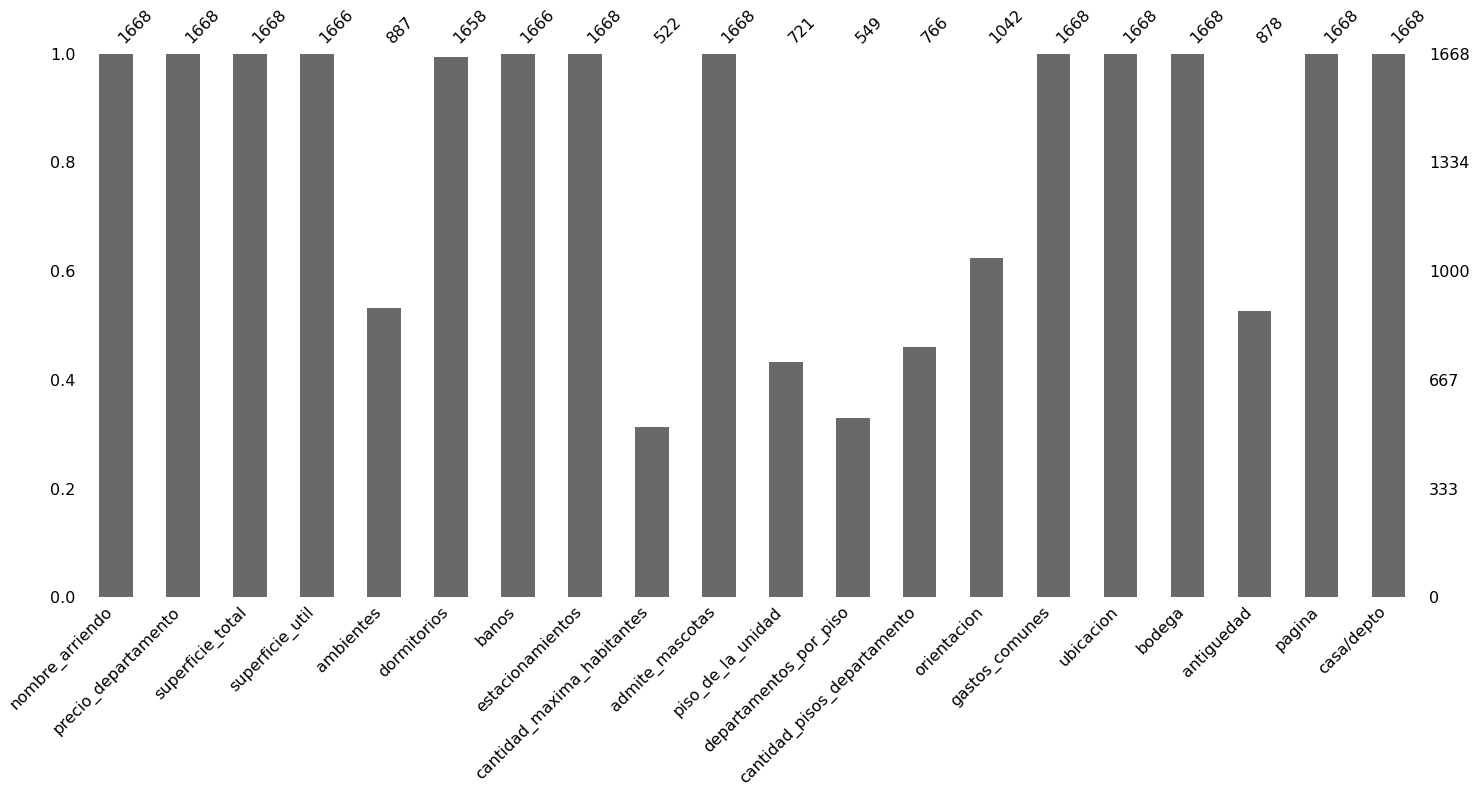

In [57]:
msno.bar(df_filtrado)

### Reorndenando variables

In [58]:
df_filtrado['pagina'][df_filtrado['ambientes'].isna()]

361     https://departamento.mercadolibre.cl/MLC-96562...
362     https://departamento.mercadolibre.cl/MLC-95419...
363     https://departamento.mercadolibre.cl/MLC-95994...
364     https://departamento.mercadolibre.cl/MLC-10064...
365     https://departamento.mercadolibre.cl/MLC-10060...
                              ...                        
2008    https://departamento.mercadolibre.cl/MLC-11272...
2009    https://departamento.mercadolibre.cl/MLC-10542...
2012    https://departamento.mercadolibre.cl/MLC-10402...
2013    https://departamento.mercadolibre.cl/MLC-10694...
2015    https://departamento.mercadolibre.cl/MLC-10968...
Name: pagina, Length: 781, dtype: object

In [59]:
df_filtrado['ambientes'] = np.where(df_filtrado['ambientes'].isna(), 0, df_filtrado['ambientes'])

In [60]:
df_filtrado['ambientes'].value_counts()

0    781
2    345
3    280
1    194
4     37
5     18
6      7
7      4
8      2
Name: ambientes, dtype: int64

In [61]:
df_filtrado['pagina'][df_filtrado['dormitorios'].isna()]

0       https://departamento.mercadolibre.cl/MLC-11412...
18      https://departamento.mercadolibre.cl/MLC-11416...
49      https://departamento.mercadolibre.cl/MLC-10870...
54      https://departamento.mercadolibre.cl/MLC-11197...
86      https://departamento.mercadolibre.cl/MLC-10981...
95      https://departamento.mercadolibre.cl/MLC-10984...
113     https://departamento.mercadolibre.cl/MLC-10781...
169     https://departamento.mercadolibre.cl/MLC-10654...
194     https://departamento.mercadolibre.cl/MLC-10771...
1931    https://departamento.mercadolibre.cl/MLC-10533...
Name: pagina, dtype: object

In [62]:
df_filtrado['dormitorios'] = np.where(df_filtrado['dormitorios'].isna(), 1, df_filtrado['dormitorios'])

In [63]:
df_filtrado['dormitorios'].value_counts()

2        644
1        524
3        294
4         99
5         62
6         23
1         10
7          4
0 - 2      2
1 - 3      2
1 - 2      1
1 - 4      1
37         1
11         1
Name: dormitorios, dtype: int64

In [64]:
for i in ['1 - 3', '0 - 2', '1 - 4', '1 - 2']:    
    df_filtrado = df_filtrado[df_filtrado['dormitorios'] != i] 

<AxesSubplot:>

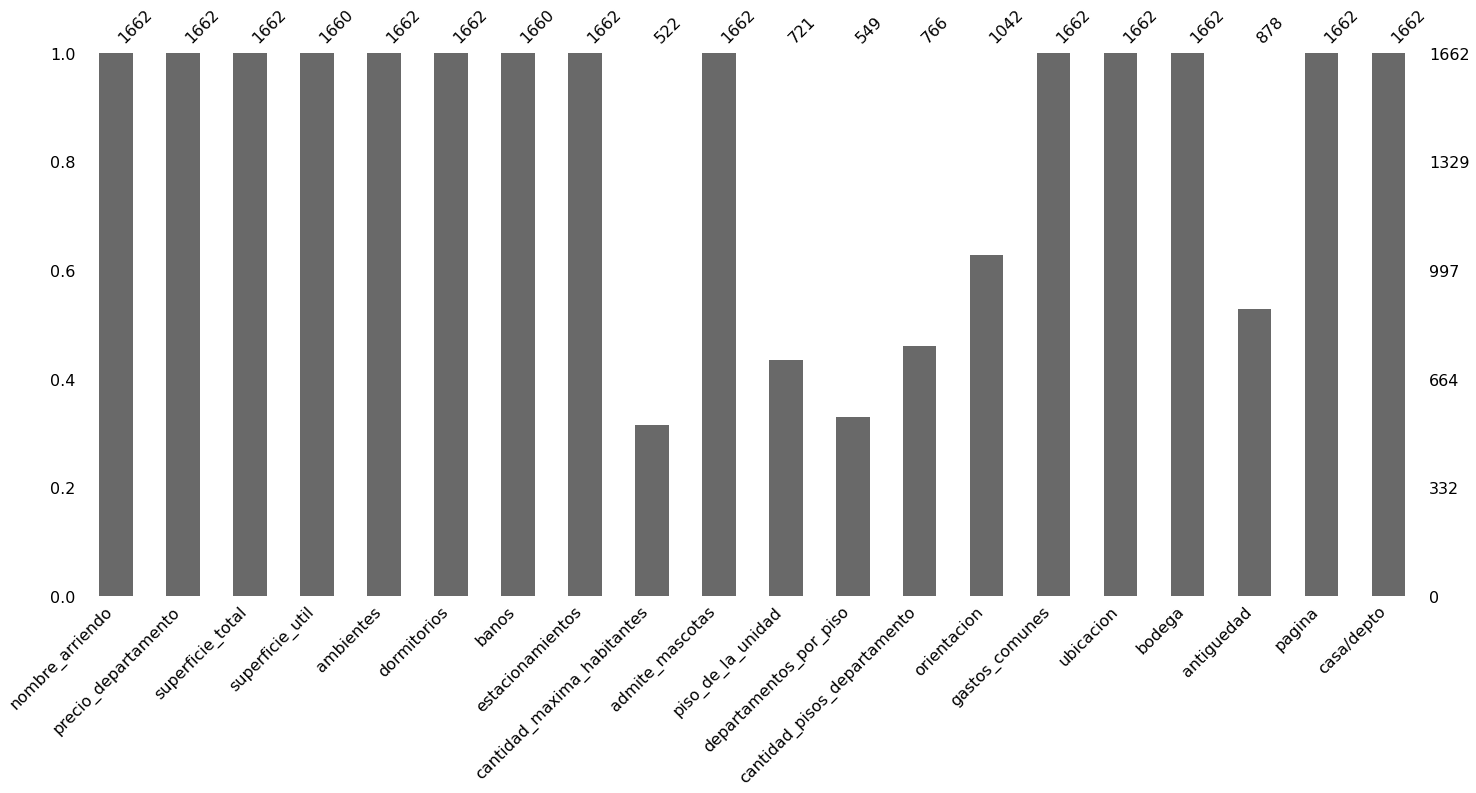

In [65]:
msno.bar(df_filtrado)

In [66]:
df_filtrado.reset_index(inplace=True, drop=True)

In [67]:
df_filtrado.head(2)

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto
0,Edificio Argomedo- Piso 8,310.000,29.42 m²,29.42 m²,1,1,1,0,2,Sí,8,25,9,NaN,35000 CLP,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",si,NaN,https://departamento.mercadolibre.cl/MLC-11412...,departamento
1,Edificio San Martin- Vista Oriente Piso 3,370.000,47.85 m²,44.85 m²,3,2,1,0,3,Sí,3,13,21,Oriente,63960 CLP,"San Martin 841, Centro Histórico de Santiago, ...",no,NaN,https://departamento.mercadolibre.cl/MLC-11415...,departamento


In [68]:
df_filtrado[df_filtrado['cantidad_maxima_habitantes'].isna()].head()

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,cantidad_maxima_habitantes,admite_mascotas,piso_de_la_unidad,departamentos_por_piso,cantidad_pisos_departamento,orientacion,gastos_comunes,ubicacion,bodega,antiguedad,pagina,casa/depto
42,Edificio Factoría Italia- Vista Oriente Piso 5,621.000,53 m²,53 m²,2,1,1,0,NaN,Sí,5,14,7,Oriente,120000 CLP,"Av. Francisco Bilbao 489, Barrio Italia, Provi...",no,NaN,https://departamento.mercadolibre.cl/MLC-10764...,departamento
55,Edificio Factoría Italia- Vista Poniente Piso 5,606.000,53 m²,53 m²,2,1,1,0,NaN,Sí,5,14,7,Oeste,120000 CLP,"Av. Francisco Bilbao 489, Barrio Italia, Provi...",no,NaN,https://departamento.mercadolibre.cl/MLC-10764...,departamento
328,The Place Live y Meet,19,42 - 53 m²,41 - 43 m²,0,1,1,0,NaN,No,NaN,NaN,NaN,NaN,0,"La Gloria 47, Nueva Las Condes, Las Condes, RM...",no,NaN,https://departamento.mercadolibre.cl/MLC-10064...,departamento
329,Coliving Antofagasta,16,36.21 - 41.26 m²,34.04 - 39 m²,0,1,1,0,NaN,No,NaN,NaN,NaN,NaN,0,"José De San Martín 2406, Centro de Antofagasta...",no,NaN,https://departamento.mercadolibre.cl/MLC-95782...,departamento
330,Casa Calle Litueche Id: 87990,650.000,12600 m²,76 m²,3,3,3,0,NaN,No,NaN,NaN,NaN,NaN,0 CLP,"Calle Litueche, Nueva San Martín, Maipú, RM (M...",no,2 años,https://casa.mercadolibre.cl/MLC-1135759765-ca...,casa


In [69]:
df_filtrado.drop(columns=['cantidad_maxima_habitantes', 'piso_de_la_unidad', 'departamentos_por_piso', 
                          'cantidad_pisos_departamento', 'antiguedad', 'pagina'], inplace = True)

<AxesSubplot:>

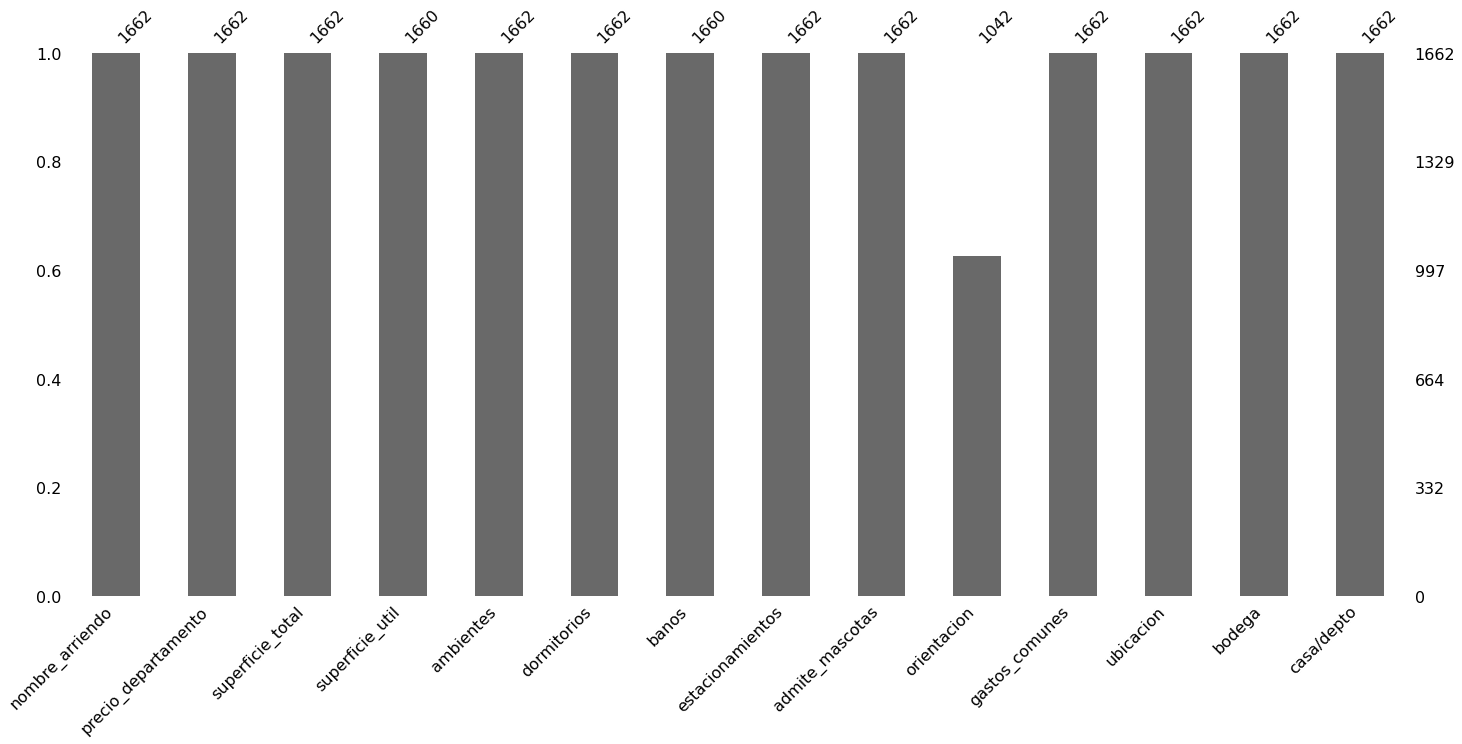

In [70]:
msno.bar(df_filtrado)

In [71]:
df_filtrado['orientacion'] = np.where(df_filtrado['orientacion'].isna(),'Sin especificar', df_filtrado['orientacion']) 

In [72]:
df_filtrado.dropna(inplace = True)

In [73]:
df_filtrado.shape

(1658, 14)

### Cambio del tipo de variable

In [74]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1661
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_arriendo      1658 non-null   object
 1   precio_departamento  1658 non-null   object
 2   superficie_total     1658 non-null   object
 3   superficie_util      1658 non-null   object
 4   ambientes            1658 non-null   object
 5   dormitorios          1658 non-null   object
 6   banos                1658 non-null   object
 7   estacionamientos     1658 non-null   object
 8   admite_mascotas      1658 non-null   object
 9   orientacion          1658 non-null   object
 10  gastos_comunes       1658 non-null   object
 11  ubicacion            1658 non-null   object
 12  bodega               1658 non-null   object
 13  casa/depto           1658 non-null   object
dtypes: object(14)
memory usage: 194.3+ KB


df_filtrado = df_filtrado.astype({'nombre_arriendo': str, 'precio_departamento':str, 'superficie_total':int, 'superficie_util':int, 
                                  'ambientes': int, 'dormitorios':int, 'banos': int, 'estacionamientos':int, 'admite_mascotas':str, 'orientacion':str, 
                                  'gastos_comunes':int,'ubicacion':str, 'bodega':str, 'casa/depto':str})

In [75]:
df_filtrado['precio_departamento'] = df_filtrado['precio_departamento'].apply(lambda x: int(x.replace(".", "")))

In [76]:
df_filtrado['precio_departamento']

0        310000
1        370000
2        245000
3        550000
4        480000
         ...   
1657     900000
1658     310000
1659     280000
1660    3000000
1661     495000
Name: precio_departamento, Length: 1658, dtype: int64

In [77]:
df_filtrado['superficie_total'] = df_filtrado['superficie_total'].apply(lambda x: x.replace(" m²",""))

In [78]:
df_filtrado['superficie_util'] = df_filtrado['superficie_util'].apply(lambda x: x.replace(" m²",""))

In [79]:
for index, value in df_filtrado['superficie_util'].iteritems():
    if '-' in value:
        print(index)

328
329


In [80]:
df_filtrado['superficie_util'][328:330]

328       41 - 43
329    34.04 - 39
Name: superficie_util, dtype: object

In [81]:
for index, value in df_filtrado['superficie_total'].iteritems():
    if '-' in value:
        df_filtrado = df_filtrado.drop(index)

In [82]:
df_filtrado[df_filtrado['superficie_util']=='41 - 43']

,nombre_arriendo,precio_departamento,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,admite_mascotas,orientacion,gastos_comunes,ubicacion,bodega,casa/depto


### Transformar la variable las columnas de string a float

In [83]:
df_filtrado['superficie_total'] = df_filtrado['superficie_total'].apply(lambda x: float(x))

In [84]:


df_filtrado['superficie_util'] = df_filtrado['superficie_util'].apply(lambda x: float(x))

In [85]:
df_filtrado['superficie_util']

0        29.42
1        44.85
2        28.00
3        58.11
4        56.90
         ...  
1657     46.00
1658     37.67
1659     29.00
1660    230.00
1661     45.00
Name: superficie_util, Length: 1656, dtype: float64

In [86]:
df_filtrado['precio_departamento'] = df_filtrado['precio_departamento'].apply(lambda x: int(x))

In [87]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1661
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombre_arriendo      1656 non-null   object 
 1   precio_departamento  1656 non-null   int64  
 2   superficie_total     1656 non-null   float64
 3   superficie_util      1656 non-null   float64
 4   ambientes            1656 non-null   object 
 5   dormitorios          1656 non-null   object 
 6   banos                1656 non-null   object 
 7   estacionamientos     1656 non-null   object 
 8   admite_mascotas      1656 non-null   object 
 9   orientacion          1656 non-null   object 
 10  gastos_comunes       1656 non-null   object 
 11  ubicacion            1656 non-null   object 
 12  bodega               1656 non-null   object 
 13  casa/depto           1656 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 194.1+ KB


In [88]:
df_filtrado['gastos_comunes'] = df_filtrado['gastos_comunes'].apply(lambda x: x.replace("CLP", ""))

In [89]:
for i in ['ambientes', 'dormitorios', 'banos', 'estacionamientos', 'gastos_comunes']:
    df_filtrado[i] = df_filtrado[i].apply(lambda x: int(x))

In [90]:
df_filtrado.select_dtypes(include=['object'])

,nombre_arriendo,admite_mascotas,orientacion,ubicacion,bodega,casa/depto
0,Edificio Argomedo- Piso 8,Sí,Sin especificar,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",si,departamento
1,Edificio San Martin- Vista Oriente Piso 3,Sí,Oriente,"San Martin 841, Centro Histórico de Santiago, ...",no,departamento
2,Edificio Buzo Sobenes- Vista Norte Piso 9,Sí,Norte,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",no,departamento
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,Sí,Oriente,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",si,departamento
4,Edificio Leonor Cepeda- Piso 11,Sí,Sin especificar,"Leonor Cepeda 952, Hospitales, Independencia, ...",si,departamento
...,...,...,...,...,...,...
1657,Amoblado Todo Incluido,No,Nor-Oeste,"Cam. San Francisco De Asis 115, Las Condes, Re...",no,departamento
1658,Depto. Nuevo 1 Hab 1 Baño. Metro San Miguel,Sí,Oeste,"Álvarez De Toledo 600 - 900, San Miguel, Chile...",no,departamento
1659,1er Mes -50%. Disfruta Vistas Despejadas. 1d M...,Sí,Norte,"Chiloe 1295, Santiago, Santiago, Chile, Parque...",no,departamento
1660,"Lo Gallo, Lo Beltran, Las Tranqueras",No,Oeste,"Lo Gallo, Lo Beltran, Las Tranqueras, Estadio ...",si,casa


In [91]:
type(df_filtrado)

pandas.core.frame.DataFrame

### Restaurar index

In [92]:
df_filtrado.reset_index(inplace=True, drop=True)

In [93]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombre_arriendo      1656 non-null   object 
 1   precio_departamento  1656 non-null   int64  
 2   superficie_total     1656 non-null   float64
 3   superficie_util      1656 non-null   float64
 4   ambientes            1656 non-null   int64  
 5   dormitorios          1656 non-null   int64  
 6   banos                1656 non-null   int64  
 7   estacionamientos     1656 non-null   int64  
 8   admite_mascotas      1656 non-null   object 
 9   orientacion          1656 non-null   object 
 10  gastos_comunes       1656 non-null   int64  
 11  ubicacion            1656 non-null   object 
 12  bodega               1656 non-null   object 
 13  casa/depto           1656 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 181.2+ KB


### Agregar Columnas region y comuna

In [94]:
df_filtrado['ubicacion'] = np.where(df_filtrado['ubicacion'] == 'Sin ubicacion', 
         'Sin ubicacion, Sin ubicacion, Sin ubicacion, Sin ubicacion', df_filtrado['ubicacion'])

In [95]:
df_filtrado['region'] = df_filtrado['ubicacion'].apply(lambda x: x.split(',')).apply(lambda x: x[-1])

In [96]:
df_filtrado['region'].value_counts()

 RM (Metropolitana)         1349
 Valparaíso                  200
 Coquimbo                     36
 Biobío                       27
 Libertador B. O'Higgins       9
 Antofagasta                   7
 La Araucanía                  7
 Los Lagos                     7
 Maule                         4
 Los Ríos                      3
 Atacama                       2
 Ñuble                         2
 Tarapacá                      2
 Sin ubicacion                 1
Name: region, dtype: int64

In [97]:
c_split = df_filtrado['ubicacion'].map(lambda x: x.split(','))

In [98]:
c_split.map(lambda x: x[0]).value_counts()

Matucana 31                 32
Las Acacias 7604            29
Briones Luco                20
Carmen                      17
Vicuña Mackenna             13
                            ..
Rhw8+mp Las Cabras           1
Olivos                       1
Zañartu 900 - 1200           1
Maipú 1136                   1
Los Abedules 1800 - 2100     1
Name: ubicacion, Length: 1083, dtype: int64

In [99]:
df_filtrado['comuna'] = df_filtrado['ubicacion'].map(lambda x: x.split(',')).map(lambda x: x[-2])

In [100]:
df_filtrado['comuna'].value_counts()

 Santiago            351
 Estación Central    158
 San Miguel          112
 Las Condes          105
 La Cisterna          86
                    ... 
 La Estrella           1
 Renca                 1
 Calama                1
 Cerrillos             1
 El Bosque             1
Name: comuna, Length: 83, dtype: int64

In [101]:
df_filtrado.rename(columns={"precio_departamento":"precio"}, inplace = True)

### Analisis de los datos obtenidos

In [102]:
df_filtrado.precio.value_counts()

400000     54
450000     47
350000     44
300000     38
280000     37
           ..
1394000     1
290001      1
491958      1
473491      1
299000      1
Name: precio, Length: 370, dtype: int64

In [103]:
df_filtrado['precio'].describe().round(2)

count    1.656000e+03
mean     5.967340e+05
std      6.642843e+06
min      1.000000e+00
25%      2.000000e+05
50%      3.600000e+05
75%      4.760000e+05
max      2.700000e+08
Name: precio, dtype: float64

In [104]:
df_filtrado[df_filtrado['precio']== df_filtrado['precio'].max()]

,nombre_arriendo,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,admite_mascotas,orientacion,gastos_comunes,ubicacion,bodega,casa/depto,region,comuna
976,"Maitencillo, Zapallar, Papudo",270000000,1000.0,350.0,0,5,4,3,No,Sin especificar,0,"Maitencillo, Puchuncaví, Chile, Maitencillo, P...",no,casa,Valparaíso,Puchuncaví


In [105]:
df_filtrado['precio'].describe().round(2)

count    1.656000e+03
mean     5.967340e+05
std      6.642843e+06
min      1.000000e+00
25%      2.000000e+05
50%      3.600000e+05
75%      4.760000e+05
max      2.700000e+08
Name: precio, dtype: float64

(array([1.655e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 2.70000009e+07, 5.40000008e+07, 8.10000007e+07,
        1.08000001e+08, 1.35000000e+08, 1.62000000e+08, 1.89000000e+08,
        2.16000000e+08, 2.43000000e+08, 2.70000000e+08]),
 <BarContainer object of 10 artists>)

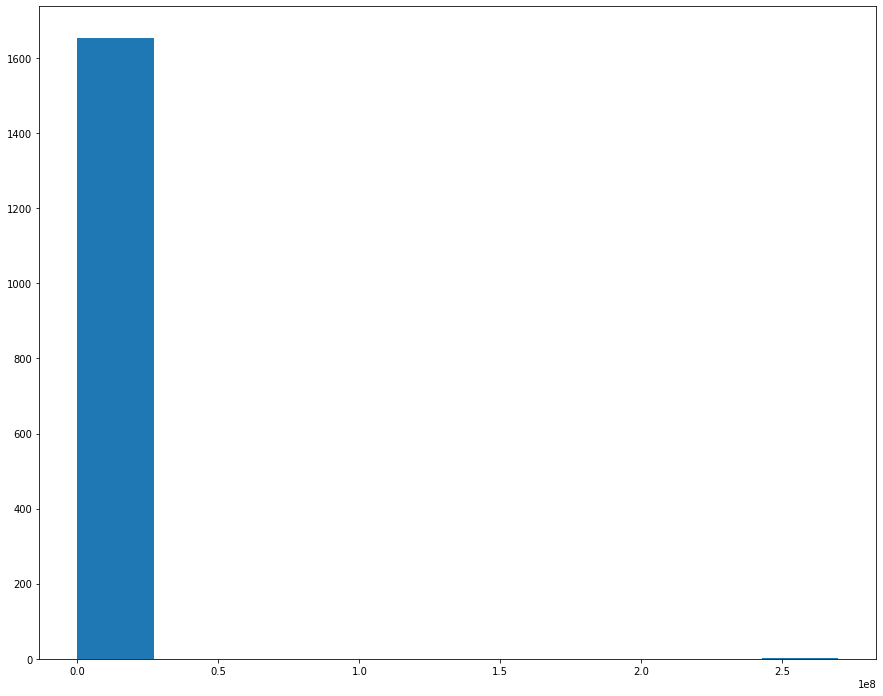

In [106]:
plt.figure(figsize=(15, 12))
plt.hist(df_filtrado['precio'])

In [107]:
round(df_filtrado.groupby('region').mean(),2)

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes
region,,,,,,,,
Antofagasta,378006.14,71.14,67.86,0.00,2.00,1.86,0.71,34285.71
Atacama,77500.00,300.00,110.00,0.00,3.00,2.00,2.50,0.00
Biobío,423889.15,547.33,126.63,1.67,2.56,2.00,1.11,53036.04
Coquimbo,131334.03,123.92,79.28,0.00,2.47,1.67,1.33,0.00
La Araucanía,138571.43,5957.14,118.29,0.00,3.29,2.14,4.00,0.00
Libertador B. O'Higgins,280555.56,1362.47,841.44,0.00,3.11,1.89,2.89,3333.33
Los Lagos,424302.57,4571.00,243.00,0.00,3.57,3.00,3.57,19714.29
Los Ríos,203333.33,3398.00,175.67,1.33,5.33,2.67,5.00,0.00
Maule,137503.00,3025.50,116.50,0.00,3.50,2.50,2.50,16250.00


In [108]:
round(df_filtrado.groupby('region').median(),2)

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes
region,,,,,,,,
Antofagasta,550000.0,70.0,65.00,0.0,2.0,2.0,1.0,0.0
Atacama,77500.0,300.0,110.00,0.0,3.0,2.0,2.5,0.0
Biobío,420000.0,57.0,54.00,2.0,2.0,2.0,1.0,40000.0
Coquimbo,77500.0,76.5,70.00,0.0,2.0,2.0,1.0,0.0
La Araucanía,135000.0,1250.0,75.00,0.0,3.0,2.0,2.0,0.0
Libertador B. O'Higgins,140000.0,500.0,150.00,0.0,3.0,2.0,2.0,0.0
Los Lagos,120000.0,800.0,251.00,0.0,3.0,2.0,4.0,0.0
Los Ríos,100000.0,144.0,144.00,1.0,6.0,2.0,3.0,0.0
Maule,135000.0,1033.0,115.00,0.0,3.0,2.5,2.5,0.0


In [109]:
round(df_filtrado.groupby('comuna').median(),2)

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes
comuna,,,,,,,,
Algarrobo,88000.0,92.00,80.00,0.0,3.0,2.0,1.0,0.0
Antofagasta,299000.0,65.50,59.00,0.0,2.0,2.0,1.0,0.0
Antuco,60000.0,10000.00,46.00,0.0,2.0,1.0,1.0,0.0
Buin,610000.0,155.00,86.19,0.0,3.0,1.5,2.0,0.0
Calama,700000.0,76.00,76.00,0.0,2.0,2.0,1.0,100000.0
...,...,...,...,...,...,...,...,...
Villarrica,135000.0,170.00,75.00,0.0,3.0,2.0,1.0,0.0
Vitacura,82.0,180.00,140.00,0.0,3.0,3.0,2.0,180000.0
Viña Del Mar,327500.0,80.00,70.00,0.0,2.5,2.0,1.0,0.0


In [110]:
df_filtrado['region'] = df_filtrado['region'].map(lambda x: x[1:])

In [111]:
df_filtrado['comuna'] = df_filtrado['comuna'].map(lambda x: x[1:])

In [112]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre_arriendo   1656 non-null   object 
 1   precio            1656 non-null   int64  
 2   superficie_total  1656 non-null   float64
 3   superficie_util   1656 non-null   float64
 4   ambientes         1656 non-null   int64  
 5   dormitorios       1656 non-null   int64  
 6   banos             1656 non-null   int64  
 7   estacionamientos  1656 non-null   int64  
 8   admite_mascotas   1656 non-null   object 
 9   orientacion       1656 non-null   object 
 10  gastos_comunes    1656 non-null   int64  
 11  ubicacion         1656 non-null   object 
 12  bodega            1656 non-null   object 
 13  casa/depto        1656 non-null   object 
 14  region            1656 non-null   object 
 15  comuna            1656 non-null   object 
dtypes: float64(2), int64(6), object(8)
memory 

In [113]:
df_filtrado[df_filtrado['region']=='RM (Metropolitana)']

,nombre_arriendo,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,admite_mascotas,orientacion,gastos_comunes,ubicacion,bodega,casa/depto,region,comuna
0,Edificio Argomedo- Piso 8,310000,29.42,29.42,1,1,1,0,Sí,Sin especificar,35000,"Argomedo 344, Santa Isabel, Santiago, RM (Metr...",si,departamento,RM (Metropolitana),Santiago
1,Edificio San Martin- Vista Oriente Piso 3,370000,47.85,44.85,3,2,1,0,Sí,Oriente,63960,"San Martin 841, Centro Histórico de Santiago, ...",no,departamento,RM (Metropolitana),Santiago
2,Edificio Buzo Sobenes- Vista Norte Piso 9,245000,28.00,28.00,2,1,1,0,Sí,Norte,56391,"Buzo Sobenes 4650, San Alberto Hurtado, Estaci...",no,departamento,RM (Metropolitana),Estación Central
3,Edificio Los Tres Antonios- Vista Oriente Piso 5,550000,65.58,58.11,3,2,2,1,Sí,Oriente,135000,"Los Tres Antonios 55, Metro Ñuñoa, Ñuñoa, RM (...",si,departamento,RM (Metropolitana),Ñuñoa
4,Edificio Leonor Cepeda- Piso 11,480000,59.40,56.90,4,3,2,1,Sí,Sin especificar,85000,"Leonor Cepeda 952, Hospitales, Independencia, ...",si,departamento,RM (Metropolitana),Independencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,Amoblado Todo Incluido,900000,43.00,46.00,0,1,1,1,No,Nor-Oeste,0,"Cam. San Francisco De Asis 115, Las Condes, Re...",no,departamento,RM (Metropolitana),Las Condes
1652,Depto. Nuevo 1 Hab 1 Baño. Metro San Miguel,310000,37.67,37.67,0,1,1,0,Sí,Oeste,65000,"Álvarez De Toledo 600 - 900, San Miguel, Chile...",no,departamento,RM (Metropolitana),San Miguel
1653,1er Mes -50%. Disfruta Vistas Despejadas. 1d M...,280000,29.00,29.00,0,1,1,0,Sí,Norte,70000,"Chiloe 1295, Santiago, Santiago, Chile, Parque...",no,departamento,RM (Metropolitana),Santiago
1654,"Lo Gallo, Lo Beltran, Las Tranqueras",3000000,543.00,230.00,8,6,4,2,No,Oeste,0,"Lo Gallo, Lo Beltran, Las Tranqueras, Estadio ...",si,casa,RM (Metropolitana),Vitacura


#### Paso de UF a Pesos
debi extraer el tipo de moneda a la que se arriendan los inmuebles. Debo hacerlo para la proxima.

In [114]:
df_filtrado['precio'] = df_filtrado['precio'].map(lambda x: x*UF if x<=1000 else x)

In [115]:
round(df_filtrado[df_filtrado['comuna']=='Vitacura'].groupby('nombre_arriendo').median(),2)

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes
nombre_arriendo,,,,,,,,
Bajó Su Precio - Estadio Croata / Las Tranqueras,1600000.00,300.00,180.00,0,3,3,2,0
Casa En Arriendo En Vitacura,2958510.85,390.00,200.00,0,4,4,2,0
Casa En Arriendo Vitacura: Club De Polo,3480601.00,390.00,270.00,0,4,5,0,0
Casa Juan De Escaray Id: 93683,2200000.00,261.00,176.00,5,5,4,2,0
Casa Ubicada En Sector Jardín Del Este,2923704.84,435.00,172.00,3,3,2,0,0
"Casa Vitacura Impecable Cercana Colegios, Conectividad",2854092.82,350.00,235.00,0,5,3,2,0
Colegio Tabancura,5300000.00,490.00,1500.00,8,6,5,15,0
Comodo Depto En Excelente Ubicación,1009374.29,93.00,85.00,0,2,3,2,180000
Departamento 2d 2 B / Vista Oriente Amoblado !!!,1148598.33,75.00,75.00,0,2,2,2,140000


In [116]:
round(df_filtrado[df_filtrado['region']=='RM (Metropolitana)'].groupby('comuna').median(),2)

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes
comuna,,,,,,,,
Buin,610000.00,155.00,86.19,0.0,3.0,1.5,2.0,0.0
Cerrillos,433000.00,112.00,75.00,3.0,3.0,2.0,1.0,90000.0
Colina,1601076.46,630.00,180.00,0.0,4.0,3.0,2.0,80000.0
Conchalí,500000.00,55.00,50.00,2.0,2.0,2.0,0.0,60000.0
El Bosque,420000.00,52.00,52.00,2.0,2.0,1.0,1.0,50000.0
Estación Central,355000.00,44.20,40.96,2.0,2.0,1.0,0.0,61000.0
Huechuraba,1600000.00,230.00,165.00,0.0,3.5,3.0,2.0,125000.0
Independencia,325000.00,37.20,36.10,2.0,1.0,1.0,0.0,60000.0
La Cisterna,380000.00,44.54,43.00,2.0,2.0,1.0,0.0,60000.0


In [117]:
round(df_filtrado[df_filtrado['region']=='RM (Metropolitana)'].groupby('comuna').mean(),2)

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes
comuna,,,,,,,,
Buin,621666.67,163.53,402.90,0.00,3.17,2.00,2.33,9166.67
Cerrillos,433000.00,112.00,75.00,3.00,3.00,2.00,1.00,90000.00
Colina,1661219.17,1342.87,205.89,1.19,3.77,3.39,3.13,81870.97
Conchalí,500000.00,55.00,50.00,2.00,2.00,2.00,0.00,60000.00
El Bosque,420000.00,52.00,52.00,2.00,2.00,1.00,1.00,50000.00
Estación Central,351162.47,41.92,39.85,1.97,1.59,1.33,0.29,61096.15
Huechuraba,1505513.19,340.00,166.83,1.00,3.83,3.17,2.17,96666.67
Independencia,345346.86,39.79,38.29,1.90,1.57,1.19,0.14,57604.71
La Cisterna,382180.05,45.67,42.31,1.73,1.79,1.35,0.28,58895.35


In [118]:
round(df_filtrado.std())

precio              6654155.0
superficie_total       1171.0
superficie_util         177.0
ambientes                 1.0
dormitorios               1.0
banos                     1.0
estacionamientos          1.0
gastos_comunes        86449.0
dtype: float64

In [119]:
round(df_filtrado.var(),2)

precio              4.427778e+13
superficie_total    1.371927e+06
superficie_util     3.142284e+04
ambientes           1.920000e+00
dormitorios         2.110000e+00
banos               1.110000e+00
estacionamientos    2.190000e+00
gastos_comunes      7.473426e+09
dtype: float64

### Analisis de graficos

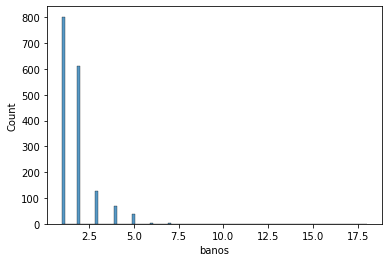

In [120]:
sns.histplot(data=df_filtrado, x ="banos")
plt.show()

<AxesSubplot:xlabel='estacionamientos', ylabel='Count'>

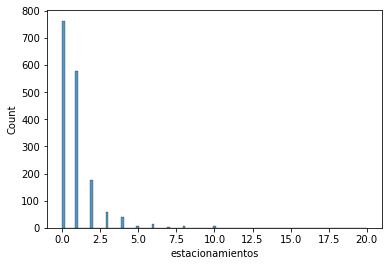

In [121]:
sns.histplot(data=df_filtrado, x ="estacionamientos")

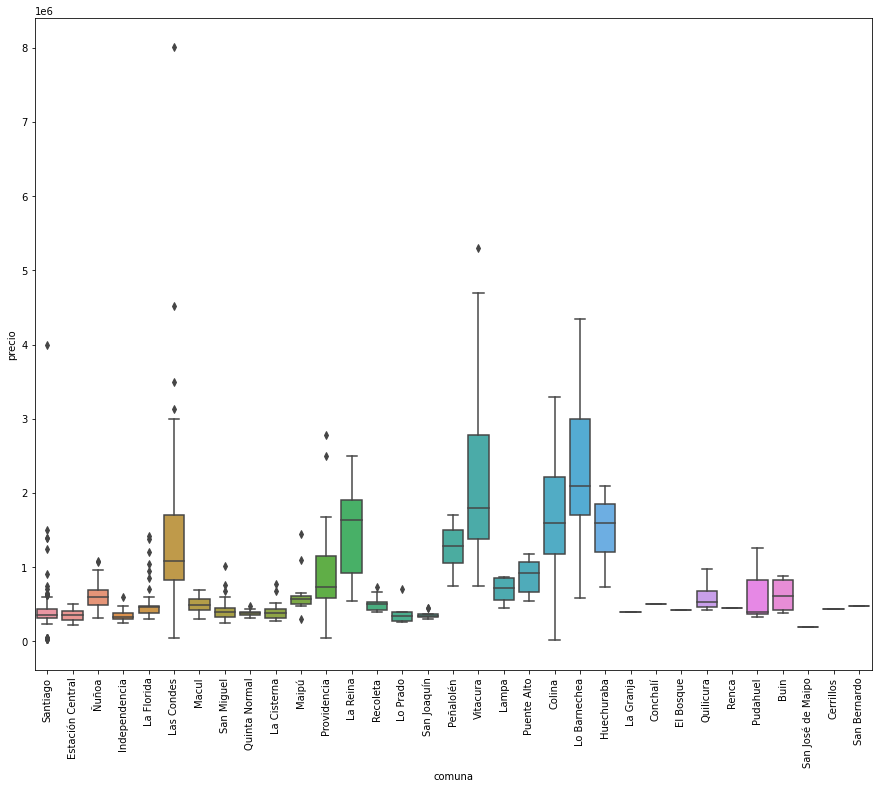

In [122]:
plt.figure(figsize=(15, 12))
sns.boxplot(y='precio', x='comuna', data=df_filtrado[df_filtrado['region']=='RM (Metropolitana)'])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='precio', ylabel='Count'>

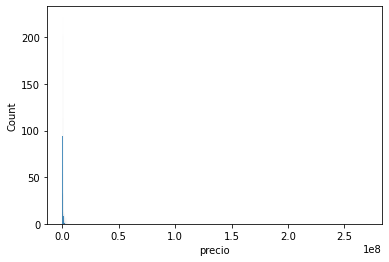

In [123]:
sns.histplot(data=df_filtrado, x ="precio")

### Normalización de variables continuas

In [124]:
df_filtrado['log_precio'] = np.log(df_filtrado['precio'])

In [125]:
df_filtrado.select_dtypes(include=['int64', 'float64'])

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes,log_precio
0,310000.0,29.42,29.42,1,1,1,0,35000,12.644328
1,370000.0,47.85,44.85,3,2,1,0,63960,12.821258
2,245000.0,28.00,28.00,2,1,1,0,56391,12.409013
3,550000.0,65.58,58.11,3,2,2,1,135000,13.217674
4,480000.0,59.40,56.90,4,3,2,1,85000,13.081541
...,...,...,...,...,...,...,...,...,...
1651,900000.0,43.00,46.00,0,1,1,1,0,13.710150
1652,310000.0,37.67,37.67,0,1,1,0,65000,12.644328
1653,280000.0,29.00,29.00,0,1,1,0,70000,12.542545
1654,3000000.0,543.00,230.00,8,6,4,2,0,14.914123


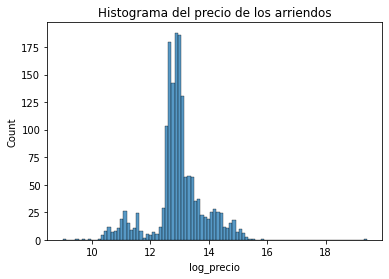

In [126]:
sns.histplot(data=df_filtrado, x ="log_precio")
plt.title('Histograma del precio de los arriendos')
plt.show()

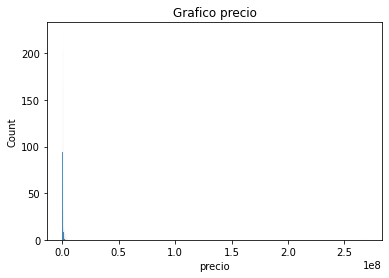

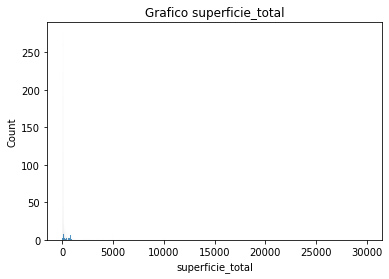

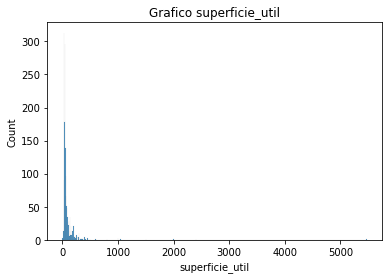

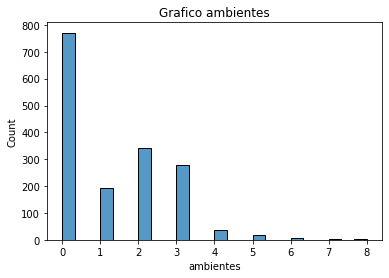

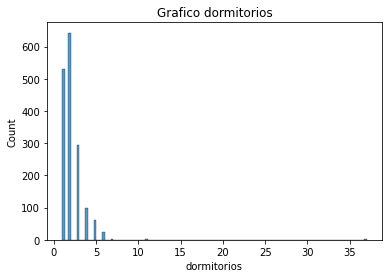

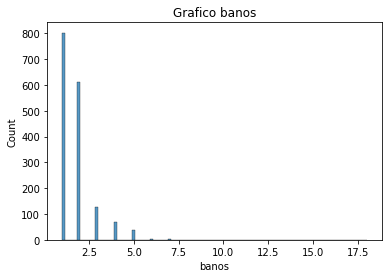

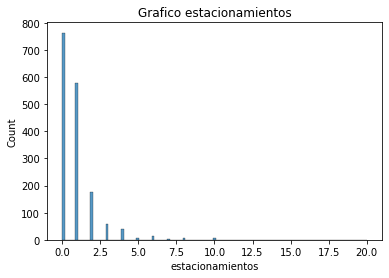

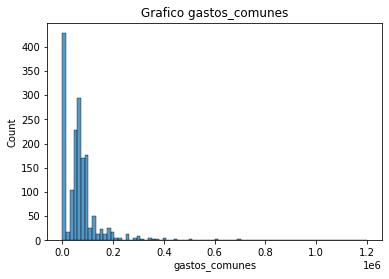

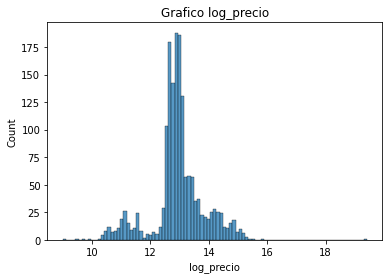

In [127]:
for i in df_filtrado.select_dtypes(include = ['int64', 'float64']):
    sns.histplot(data=df_filtrado, x = i)
    plt.title(f'Grafico {i}')
    plt.show()

<Figure size 936x576 with 0 Axes>

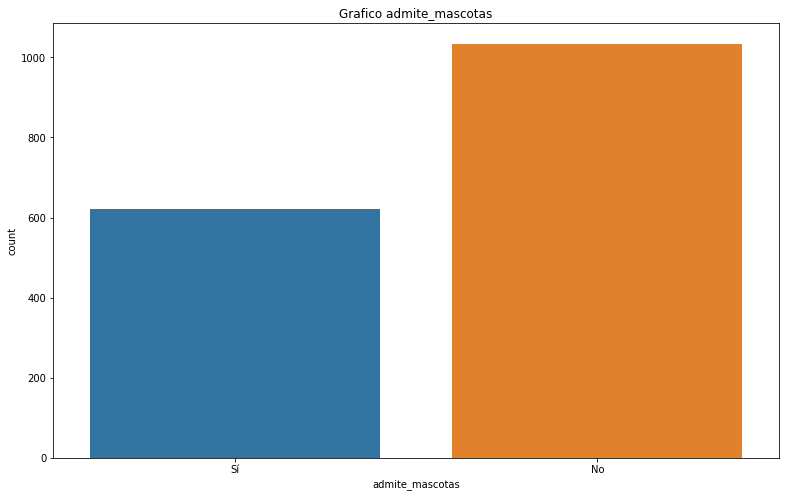

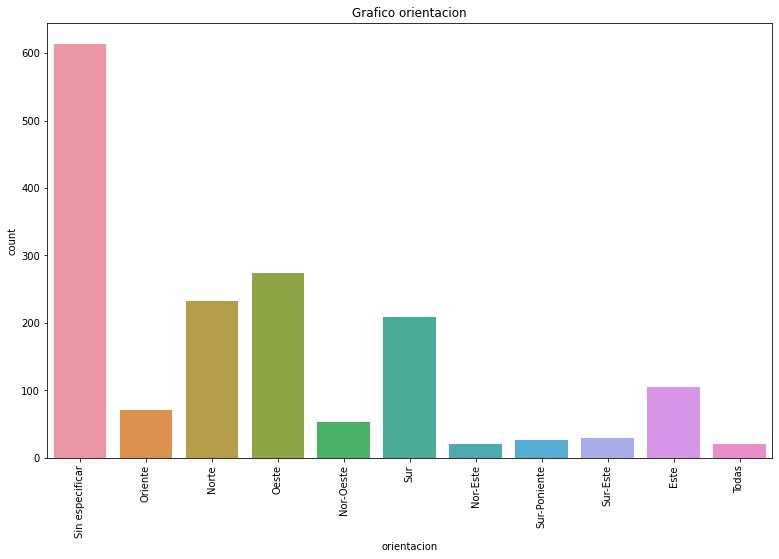

<Figure size 936x576 with 0 Axes>

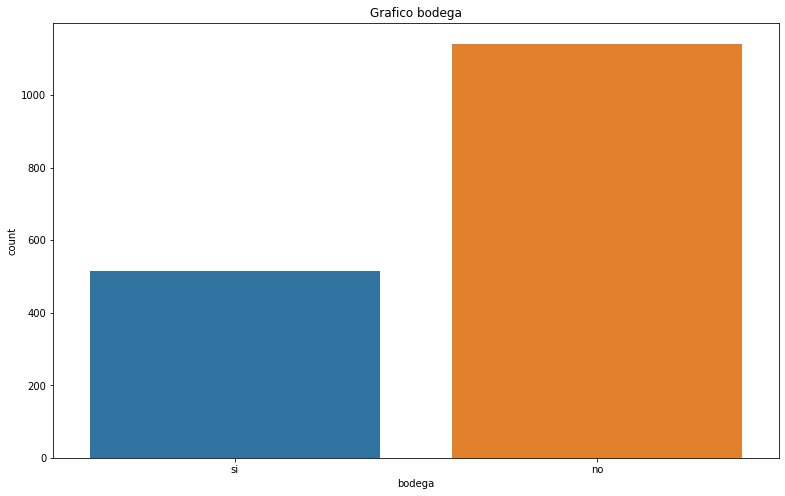

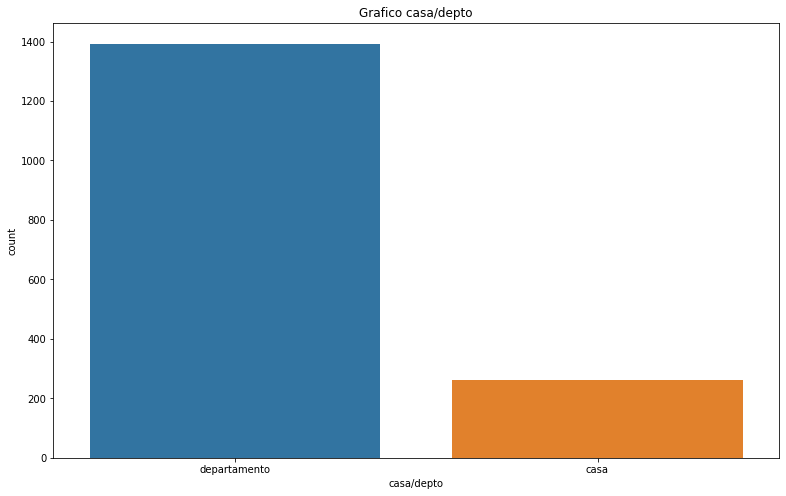

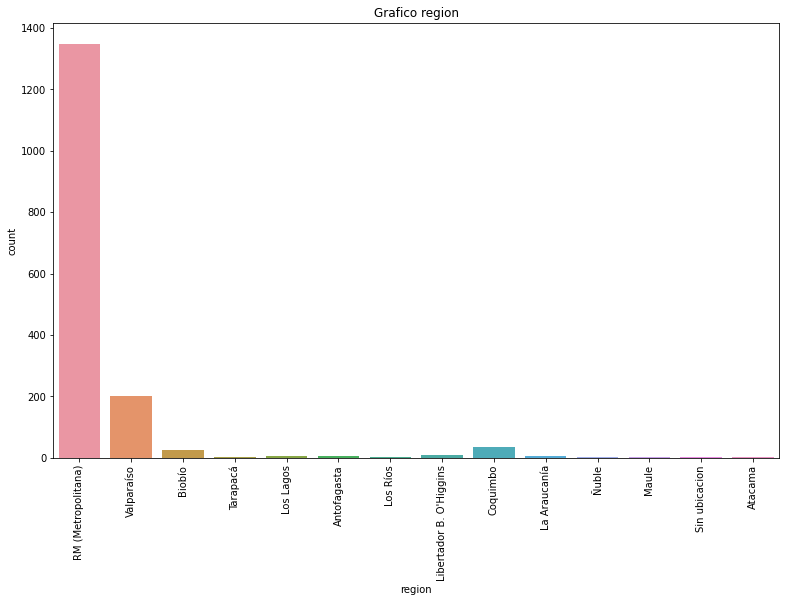

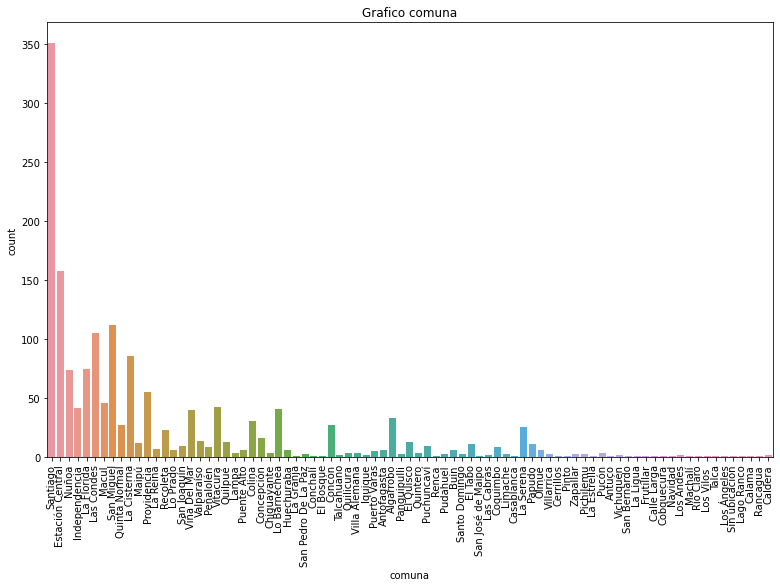

In [128]:
for i in df_filtrado.select_dtypes(include = ['O']):
    plt.figure(figsize=(13, 8))
    
    if (i=='nombre_arriendo') | (i == 'ubicacion'):
        continue
    
    sns.countplot(x=i, data=df_filtrado)
    plt.title(f'Grafico {i}')
    plt.xticks(rotation = 90)
    if len(df_filtrado[i].value_counts())<=2:
        plt.xticks(rotation = 0)
    plt.show()

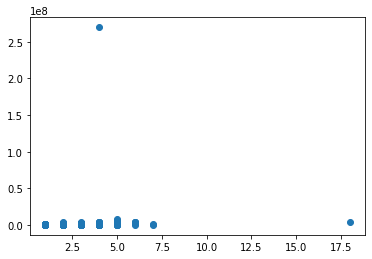

In [136]:
plt.scatter(x=df_filtrado['banos'], y=df_filtrado['precio'])

### Correlacion entre columnas

In [137]:
df_filtrado.corr()

,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,gastos_comunes,log_precio
precio,1.000000,0.024802,0.067835,-0.003258,0.097958,0.121472,0.074803,0.026528,0.255289
superficie_total,0.024802,1.000000,0.151970,-0.064173,0.254991,0.241864,0.433309,-0.058701,0.006122
superficie_util,0.067835,0.151970,1.000000,-0.009076,0.367521,0.388838,0.362599,0.056275,0.182046
ambientes,-0.003258,-0.064173,-0.009076,1.000000,0.079704,0.082469,-0.046624,0.192931,0.262212
dormitorios,0.097958,0.254991,0.367521,0.079704,1.000000,0.807211,0.486438,0.086436,0.322205
banos,0.121472,0.241864,0.388838,0.082469,0.807211,1.000000,0.523608,0.257969,0.516425
estacionamientos,0.074803,0.433309,0.362599,-0.046624,0.486438,0.523608,1.000000,0.057389,0.220819
gastos_comunes,0.026528,-0.058701,0.056275,0.192931,0.086436,0.257969,0.057389,1.000000,0.444951
log_precio,0.255289,0.006122,0.182046,0.262212,0.322205,0.516425,0.220819,0.444951,1.000000


Text(0.5, 1.0, 'Mapa de calor de correlación entre variables')

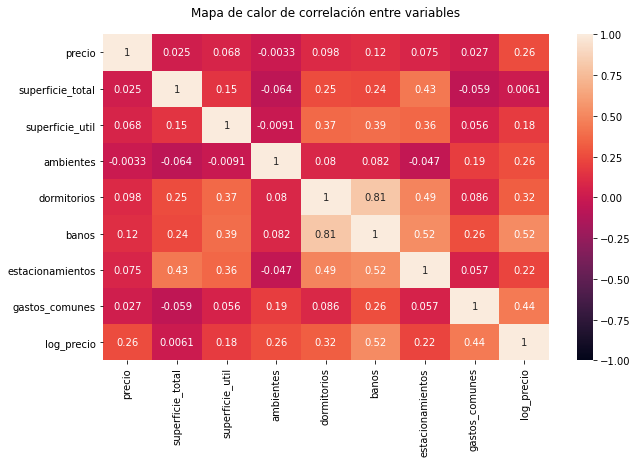

In [151]:
plt.figure(figsize=(10,6))
sns.heatmap(df_filtrado.corr(), vmin=-1, vmax=1, annot=True).set_title('Mapa de calor de correlación entre variables', 
                                                                       fontdict={'fontsize':12}, pad=18)

### Utilizare K-means para identificar posibles subgrupos

In [129]:
df_filtrado.shape[0]

1656

### Preparar la data para modelar

In [152]:
df_model = df_filtrado

#### En admite_mascotas Sí se reemplazara por un 1 y No por un 0

In [154]:
df_model['admite_mascotas'] = np.where(df_model['admite_mascotas']=='No', 0, 1)

In [156]:
df_model.sample()

,nombre_arriendo,precio,superficie_total,superficie_util,ambientes,dormitorios,banos,estacionamientos,admite_mascotas,orientacion,gastos_comunes,ubicacion,bodega,casa/depto,region,comuna,log_precio
935,Depto. 3 Dorm. 2 Baños Con Estac. Y Bodega.,790000.0,100.0,90.0,0,3,2,1,0,Oeste,140000,"Avenida Ricardo Lyon 3037, Ñuñoa, Chile, Metro...",si,departamento,RM (Metropolitana),Ñuñoa,13.579788
